## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  12.147659  1753.675985  0.231211  9.534562  1.442404
1  11.310318   421.390419  0.612984  1.875396  1.619271
2  87.820961  1353.524377  0.248739  3.667866  1.238270
3  59.058060   724.700889  0.071695  1.490503  0.816558
4  75.535013  1125.925570  0.077163  2.416273  0.858300


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.85627 | train_mse: 3.87026 | train_mae: 1.4505  |  0:00:00s
epoch 1  | loss: 0.78707 | train_mse: 3.48274 | train_mae: 1.3453  |  0:00:00s
epoch 2  | loss: 0.78992 | train_mse: 3.20151 | train_mae: 1.20638 |  0:00:00s


epoch 3  | loss: 0.77511 | train_mse: 2.61121 | train_mae: 1.0875  |  0:00:00s
epoch 4  | loss: 0.68143 | train_mse: 1.57032 | train_mae: 0.92493 |  0:00:00s


epoch 5  | loss: 0.58396 | train_mse: 2.1744  | train_mae: 1.0955  |  0:00:00s
epoch 6  | loss: 0.59279 | train_mse: 2.03841 | train_mae: 1.04166 |  0:00:00s


epoch 7  | loss: 0.58031 | train_mse: 1.63559 | train_mae: 0.90578 |  0:00:01s
epoch 8  | loss: 0.61842 | train_mse: 2.00221 | train_mae: 1.02054 |  0:00:01s


epoch 9  | loss: 0.54285 | train_mse: 1.20094 | train_mae: 0.80062 |  0:00:01s
epoch 10 | loss: 0.46822 | train_mse: 0.83829 | train_mae: 0.64029 |  0:00:01s


epoch 11 | loss: 0.49414 | train_mse: 0.84181 | train_mae: 0.64625 |  0:00:01s
epoch 12 | loss: 0.51815 | train_mse: 0.89849 | train_mae: 0.68117 |  0:00:01s


epoch 13 | loss: 0.48625 | train_mse: 0.79771 | train_mae: 0.65911 |  0:00:01s
epoch 14 | loss: 0.47755 | train_mse: 0.67564 | train_mae: 0.61441 |  0:00:02s


epoch 15 | loss: 0.55539 | train_mse: 0.65248 | train_mae: 0.60574 |  0:00:02s
epoch 16 | loss: 0.47587 | train_mse: 0.53362 | train_mae: 0.58431 |  0:00:02s
epoch 17 | loss: 0.32879 | train_mse: 0.53454 | train_mae: 0.55488 |  0:00:02s


epoch 18 | loss: 0.46009 | train_mse: 0.58932 | train_mae: 0.55167 |  0:00:02s


epoch 19 | loss: 0.38321 | train_mse: 0.56131 | train_mae: 0.53529 |  0:00:02s
epoch 20 | loss: 0.29629 | train_mse: 0.38886 | train_mae: 0.43973 |  0:00:02s


epoch 21 | loss: 0.19997 | train_mse: 0.24999 | train_mae: 0.38202 |  0:00:03s
epoch 22 | loss: 0.16632 | train_mse: 0.25637 | train_mae: 0.38214 |  0:00:03s


epoch 23 | loss: 0.37014 | train_mse: 0.26693 | train_mae: 0.39177 |  0:00:03s
epoch 24 | loss: 0.23127 | train_mse: 0.23331 | train_mae: 0.36754 |  0:00:03s
epoch 25 | loss: 0.19578 | train_mse: 0.21248 | train_mae: 0.34629 |  0:00:03s


epoch 26 | loss: 0.41013 | train_mse: 0.22258 | train_mae: 0.33073 |  0:00:03s
epoch 27 | loss: 0.2975  | train_mse: 0.17823 | train_mae: 0.31651 |  0:00:03s


epoch 28 | loss: 0.22206 | train_mse: 0.19074 | train_mae: 0.32837 |  0:00:03s
epoch 29 | loss: 0.21864 | train_mse: 0.20688 | train_mae: 0.3421  |  0:00:04s


epoch 30 | loss: 0.21675 | train_mse: 0.20472 | train_mae: 0.33951 |  0:00:04s
epoch 31 | loss: 0.14218 | train_mse: 0.24871 | train_mae: 0.36634 |  0:00:04s
epoch 32 | loss: 0.26091 | train_mse: 0.2391  | train_mae: 0.35519 |  0:00:04s


epoch 33 | loss: 0.32775 | train_mse: 0.2371  | train_mae: 0.37877 |  0:00:04s
epoch 34 | loss: 0.33015 | train_mse: 0.22189 | train_mae: 0.36776 |  0:00:04s
epoch 35 | loss: 0.18429 | train_mse: 0.19597 | train_mae: 0.32381 |  0:00:04s


epoch 36 | loss: 0.13717 | train_mse: 0.22595 | train_mae: 0.34584 |  0:00:04s
epoch 37 | loss: 0.26298 | train_mse: 0.23675 | train_mae: 0.34769 |  0:00:04s
epoch 38 | loss: 0.30095 | train_mse: 0.20521 | train_mae: 0.33584 |  0:00:04s


epoch 39 | loss: 0.27979 | train_mse: 0.19419 | train_mae: 0.33342 |  0:00:04s
epoch 40 | loss: 0.16151 | train_mse: 0.19785 | train_mae: 0.33155 |  0:00:04s
epoch 41 | loss: 0.28088 | train_mse: 0.20045 | train_mae: 0.33719 |  0:00:04s
epoch 42 | loss: 0.17828 | train_mse: 0.18502 | train_mae: 0.32631 |  0:00:05s


epoch 43 | loss: 0.22595 | train_mse: 0.18932 | train_mae: 0.32129 |  0:00:05s
epoch 44 | loss: 0.17765 | train_mse: 0.16319 | train_mae: 0.29941 |  0:00:05s
epoch 45 | loss: 0.13872 | train_mse: 0.19224 | train_mae: 0.31699 |  0:00:05s
epoch 46 | loss: 0.13931 | train_mse: 0.27065 | train_mae: 0.36748 |  0:00:05s


epoch 47 | loss: 0.33957 | train_mse: 0.19253 | train_mae: 0.33268 |  0:00:05s
epoch 48 | loss: 0.22694 | train_mse: 0.1766  | train_mae: 0.32127 |  0:00:05s
epoch 49 | loss: 0.22587 | train_mse: 0.14286 | train_mae: 0.28676 |  0:00:05s


epoch 50 | loss: 0.29677 | train_mse: 0.13116 | train_mae: 0.27633 |  0:00:05s
epoch 51 | loss: 0.21878 | train_mse: 0.13115 | train_mae: 0.27062 |  0:00:05s
epoch 52 | loss: 0.26512 | train_mse: 0.10656 | train_mae: 0.25826 |  0:00:05s


epoch 53 | loss: 0.11844 | train_mse: 0.10952 | train_mae: 0.25443 |  0:00:05s
epoch 54 | loss: 0.12692 | train_mse: 0.11116 | train_mae: 0.25411 |  0:00:05s


epoch 55 | loss: 0.50743 | train_mse: 0.11705 | train_mae: 0.25645 |  0:00:06s
epoch 56 | loss: 0.17578 | train_mse: 0.1245  | train_mae: 0.25945 |  0:00:06s


epoch 57 | loss: 0.23021 | train_mse: 0.12716 | train_mae: 0.25883 |  0:00:06s


epoch 58 | loss: 0.19781 | train_mse: 0.12037 | train_mae: 0.2454  |  0:00:06s
epoch 59 | loss: 0.16156 | train_mse: 0.12323 | train_mae: 0.25111 |  0:00:06s


epoch 60 | loss: 0.1641  | train_mse: 0.11778 | train_mae: 0.25028 |  0:00:06s


epoch 61 | loss: 0.24773 | train_mse: 0.10588 | train_mae: 0.23814 |  0:00:07s
epoch 62 | loss: 0.1702  | train_mse: 0.10711 | train_mae: 0.23889 |  0:00:07s
epoch 63 | loss: 0.27362 | train_mse: 0.11038 | train_mae: 0.24684 |  0:00:07s


epoch 64 | loss: 0.11253 | train_mse: 0.10968 | train_mae: 0.24366 |  0:00:07s
epoch 65 | loss: 0.15471 | train_mse: 0.10766 | train_mae: 0.24826 |  0:00:07s


epoch 66 | loss: 0.22766 | train_mse: 0.1198  | train_mae: 0.25973 |  0:00:08s
epoch 67 | loss: 0.10263 | train_mse: 0.07843 | train_mae: 0.22979 |  0:00:08s
epoch 68 | loss: 0.06647 | train_mse: 0.11461 | train_mae: 0.26435 |  0:00:08s


epoch 69 | loss: 0.27224 | train_mse: 0.13095 | train_mae: 0.27564 |  0:00:08s
epoch 70 | loss: 0.10621 | train_mse: 0.08884 | train_mae: 0.2425  |  0:00:08s


epoch 71 | loss: 0.23759 | train_mse: 0.08821 | train_mae: 0.2377  |  0:00:08s
epoch 72 | loss: 0.12323 | train_mse: 0.09698 | train_mae: 0.24202 |  0:00:08s
epoch 73 | loss: 0.17937 | train_mse: 0.1254  | train_mae: 0.24845 |  0:00:08s


epoch 74 | loss: 0.35567 | train_mse: 0.22186 | train_mae: 0.35445 |  0:00:08s
epoch 75 | loss: 0.16862 | train_mse: 0.17497 | train_mae: 0.30857 |  0:00:08s
epoch 76 | loss: 0.17104 | train_mse: 0.17256 | train_mae: 0.31663 |  0:00:08s


epoch 77 | loss: 0.17628 | train_mse: 0.21949 | train_mae: 0.34893 |  0:00:09s
epoch 78 | loss: 0.14972 | train_mse: 0.11026 | train_mae: 0.26248 |  0:00:09s
epoch 79 | loss: 0.19999 | train_mse: 0.07573 | train_mae: 0.22225 |  0:00:09s


epoch 80 | loss: 0.13221 | train_mse: 0.08574 | train_mae: 0.2429  |  0:00:09s
epoch 81 | loss: 0.1738  | train_mse: 0.07712 | train_mae: 0.22431 |  0:00:09s
epoch 82 | loss: 0.12642 | train_mse: 0.07809 | train_mae: 0.21876 |  0:00:09s


epoch 83 | loss: 0.13939 | train_mse: 0.08312 | train_mae: 0.22713 |  0:00:09s
epoch 84 | loss: 0.1405  | train_mse: 0.08838 | train_mae: 0.21691 |  0:00:09s
epoch 85 | loss: 0.25672 | train_mse: 0.09017 | train_mae: 0.21494 |  0:00:09s


epoch 86 | loss: 0.19675 | train_mse: 0.08997 | train_mae: 0.21361 |  0:00:09s
epoch 87 | loss: 0.22101 | train_mse: 0.08515 | train_mae: 0.2135  |  0:00:09s
epoch 88 | loss: 0.16364 | train_mse: 0.08276 | train_mae: 0.22141 |  0:00:09s


epoch 89 | loss: 0.1869  | train_mse: 0.06247 | train_mae: 0.20155 |  0:00:10s
epoch 90 | loss: 0.33986 | train_mse: 0.07599 | train_mae: 0.22253 |  0:00:10s


epoch 91 | loss: 0.20449 | train_mse: 0.07942 | train_mae: 0.22344 |  0:00:10s
epoch 92 | loss: 0.14064 | train_mse: 0.07303 | train_mae: 0.21343 |  0:00:10s


epoch 93 | loss: 0.11119 | train_mse: 0.06653 | train_mae: 0.20201 |  0:00:10s
epoch 94 | loss: 0.15356 | train_mse: 0.06219 | train_mae: 0.19767 |  0:00:11s


epoch 95 | loss: 0.12173 | train_mse: 0.05989 | train_mae: 0.19843 |  0:00:11s


epoch 96 | loss: 0.15705 | train_mse: 0.07484 | train_mae: 0.21321 |  0:00:11s
epoch 97 | loss: 0.13269 | train_mse: 0.06258 | train_mae: 0.19066 |  0:00:11s


epoch 98 | loss: 0.1431  | train_mse: 0.06211 | train_mae: 0.1876  |  0:00:11s
epoch 99 | loss: 0.12192 | train_mse: 0.07352 | train_mae: 0.1994  |  0:00:11s
epoch 100| loss: 0.11585 | train_mse: 0.07896 | train_mae: 0.2119  |  0:00:11s


epoch 101| loss: 0.07823 | train_mse: 0.07597 | train_mae: 0.21263 |  0:00:11s
epoch 102| loss: 0.15244 | train_mse: 0.10796 | train_mae: 0.25177 |  0:00:11s


epoch 103| loss: 0.44218 | train_mse: 0.11597 | train_mae: 0.25428 |  0:00:12s
epoch 104| loss: 0.20549 | train_mse: 0.10345 | train_mae: 0.238   |  0:00:12s
epoch 105| loss: 0.17431 | train_mse: 0.10058 | train_mae: 0.23001 |  0:00:12s


epoch 106| loss: 0.11755 | train_mse: 0.09828 | train_mae: 0.22344 |  0:00:12s
epoch 107| loss: 0.10715 | train_mse: 0.0924  | train_mae: 0.21456 |  0:00:12s


epoch 108| loss: 0.093   | train_mse: 0.07703 | train_mae: 0.20222 |  0:00:12s
epoch 109| loss: 0.12542 | train_mse: 0.06655 | train_mae: 0.19072 |  0:00:12s
epoch 110| loss: 0.22296 | train_mse: 0.05478 | train_mae: 0.18899 |  0:00:12s


epoch 111| loss: 0.15638 | train_mse: 0.04981 | train_mae: 0.17592 |  0:00:12s
epoch 112| loss: 0.08498 | train_mse: 0.05038 | train_mae: 0.17033 |  0:00:12s
epoch 113| loss: 0.06159 | train_mse: 0.05833 | train_mae: 0.18236 |  0:00:13s


epoch 114| loss: 0.23905 | train_mse: 0.06065 | train_mae: 0.18947 |  0:00:13s
epoch 115| loss: 0.11937 | train_mse: 0.05686 | train_mae: 0.18532 |  0:00:13s


epoch 116| loss: 0.13087 | train_mse: 0.05565 | train_mae: 0.18459 |  0:00:13s
epoch 117| loss: 0.27247 | train_mse: 0.05316 | train_mae: 0.17752 |  0:00:13s


epoch 118| loss: 0.10277 | train_mse: 0.05465 | train_mae: 0.18311 |  0:00:13s
epoch 119| loss: 0.12899 | train_mse: 0.05987 | train_mae: 0.19221 |  0:00:13s


epoch 120| loss: 0.11235 | train_mse: 0.06348 | train_mae: 0.1986  |  0:00:13s
epoch 121| loss: 0.16958 | train_mse: 0.06438 | train_mae: 0.19877 |  0:00:14s


epoch 122| loss: 0.09669 | train_mse: 0.05731 | train_mae: 0.19237 |  0:00:14s
epoch 123| loss: 0.11133 | train_mse: 0.07001 | train_mae: 0.19895 |  0:00:14s
epoch 124| loss: 0.08032 | train_mse: 0.07929 | train_mae: 0.20505 |  0:00:14s


epoch 125| loss: 0.10861 | train_mse: 0.07311 | train_mae: 0.20393 |  0:00:14s
epoch 126| loss: 0.14156 | train_mse: 0.07182 | train_mae: 0.20766 |  0:00:14s


epoch 127| loss: 0.14562 | train_mse: 0.09605 | train_mae: 0.23223 |  0:00:14s
epoch 128| loss: 0.14353 | train_mse: 0.07893 | train_mae: 0.2192  |  0:00:14s
epoch 129| loss: 0.06501 | train_mse: 0.0717  | train_mae: 0.21207 |  0:00:14s


epoch 130| loss: 0.08659 | train_mse: 0.07079 | train_mae: 0.21148 |  0:00:15s
epoch 131| loss: 0.13446 | train_mse: 0.06747 | train_mae: 0.19297 |  0:00:15s
epoch 132| loss: 0.17453 | train_mse: 0.08585 | train_mae: 0.21182 |  0:00:15s


epoch 133| loss: 0.16159 | train_mse: 0.0914  | train_mae: 0.2233  |  0:00:15s
epoch 134| loss: 0.17257 | train_mse: 0.07183 | train_mae: 0.20419 |  0:00:15s


epoch 135| loss: 0.26323 | train_mse: 0.05846 | train_mae: 0.18293 |  0:00:15s
epoch 136| loss: 0.15501 | train_mse: 0.07702 | train_mae: 0.21959 |  0:00:15s
epoch 137| loss: 0.10414 | train_mse: 0.07373 | train_mae: 0.21591 |  0:00:15s


epoch 138| loss: 0.11288 | train_mse: 0.10865 | train_mae: 0.22572 |  0:00:15s
epoch 139| loss: 0.2328  | train_mse: 0.10621 | train_mae: 0.24832 |  0:00:15s
epoch 140| loss: 0.21188 | train_mse: 0.09682 | train_mae: 0.24044 |  0:00:15s
epoch 141| loss: 0.20909 | train_mse: 0.08418 | train_mae: 0.21756 |  0:00:15s


epoch 142| loss: 0.21754 | train_mse: 0.08522 | train_mae: 0.21965 |  0:00:15s
epoch 143| loss: 0.12573 | train_mse: 0.08844 | train_mae: 0.21418 |  0:00:16s
epoch 144| loss: 0.1099  | train_mse: 0.07199 | train_mae: 0.20113 |  0:00:16s
epoch 145| loss: 0.13441 | train_mse: 0.06641 | train_mae: 0.20071 |  0:00:16s


epoch 146| loss: 0.12092 | train_mse: 0.0583  | train_mae: 0.19816 |  0:00:16s
epoch 147| loss: 0.08203 | train_mse: 0.06597 | train_mae: 0.20106 |  0:00:16s
epoch 148| loss: 0.24901 | train_mse: 0.06398 | train_mae: 0.19722 |  0:00:16s
epoch 149| loss: 0.09955 | train_mse: 0.05112 | train_mae: 0.1792  |  0:00:16s


epoch 150| loss: 0.10382 | train_mse: 0.04582 | train_mae: 0.17305 |  0:00:16s
epoch 151| loss: 0.07376 | train_mse: 0.04615 | train_mae: 0.17173 |  0:00:16s
epoch 152| loss: 0.09803 | train_mse: 0.05084 | train_mae: 0.1781  |  0:00:16s
epoch 153| loss: 0.1195  | train_mse: 0.05858 | train_mae: 0.19272 |  0:00:16s


epoch 154| loss: 0.44381 | train_mse: 0.07951 | train_mae: 0.21033 |  0:00:16s
epoch 155| loss: 0.21503 | train_mse: 0.09278 | train_mae: 0.22914 |  0:00:16s
epoch 156| loss: 0.25027 | train_mse: 0.06866 | train_mae: 0.21018 |  0:00:16s
epoch 157| loss: 0.09033 | train_mse: 0.05738 | train_mae: 0.19582 |  0:00:16s


epoch 158| loss: 0.10809 | train_mse: 0.04918 | train_mae: 0.18111 |  0:00:17s
epoch 159| loss: 0.22624 | train_mse: 0.0593  | train_mae: 0.19215 |  0:00:17s
epoch 160| loss: 0.34823 | train_mse: 0.06991 | train_mae: 0.20884 |  0:00:17s
epoch 161| loss: 0.16573 | train_mse: 0.09803 | train_mae: 0.23706 |  0:00:17s


epoch 162| loss: 0.31974 | train_mse: 0.18762 | train_mae: 0.31955 |  0:00:17s

Early stopping occurred at epoch 162 with best_epoch = 112 and best_train_mae = 0.17033
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

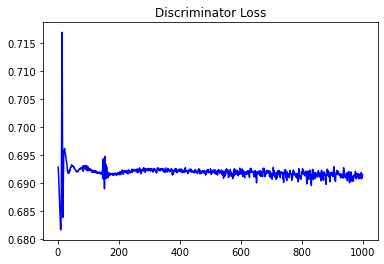

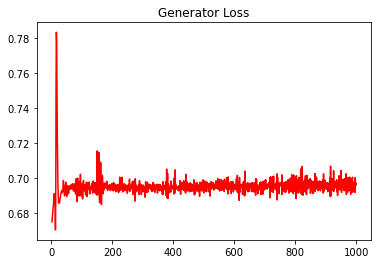

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19002619659820838


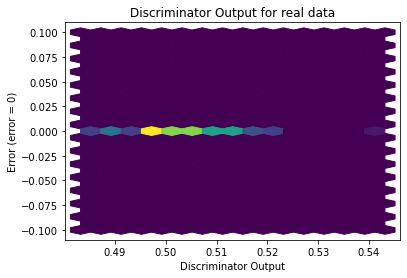

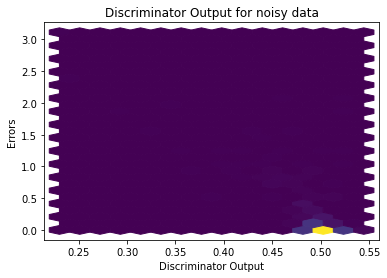

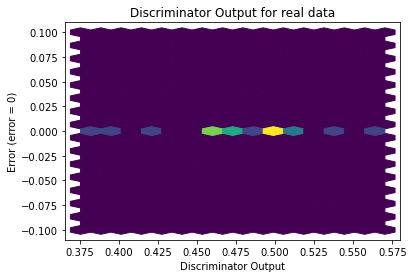

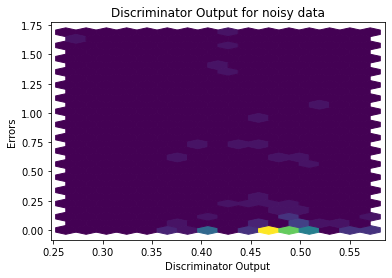

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


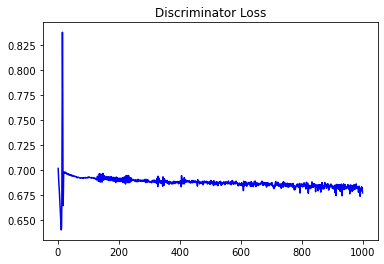

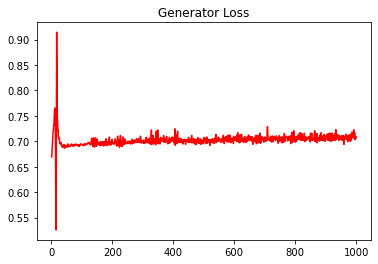

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.28830359210112777


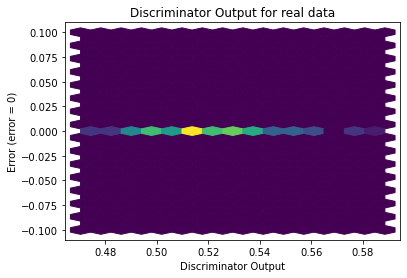

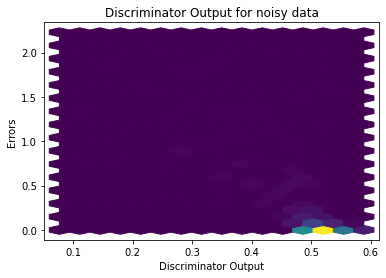

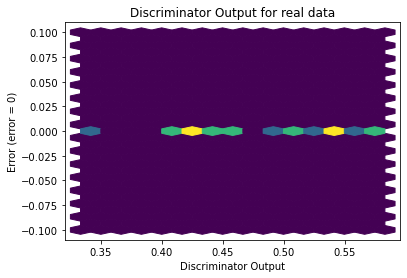

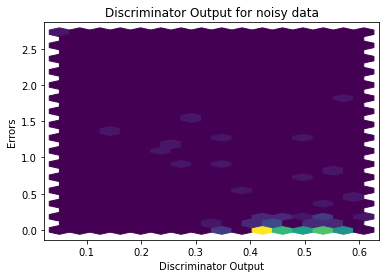

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1154]], requires_grad=True)
